In [16]:
#importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import subprocess as sp
import sys,os,shutil,pickle,time

In [3]:
df = pd.read_csv('true_car_listings.csv')
df.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [11]:
#droping unimportant variables
drop_cols =['City','State','Vin']
df= df.drop(drop_cols, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851154 entries, 0 to 852121
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    851154 non-null  int64 
 1   Year     851154 non-null  int64 
 2   Mileage  851154 non-null  int64 
 3   Make     851154 non-null  object
 4   Model    851154 non-null  object
dtypes: int64(3), object(2)
memory usage: 39.0+ MB


In [12]:
#droping dupliate rows if any
df = df.drop_duplicates(keep='first')

In [14]:
#shape of the data
df.shape

(851154, 5)

In [15]:
#summary statistics
df.describe()

,Price,Year,Mileage
count,851154.000000,851154.000000,8.511540e+05
mean,21460.498441,2013.285225,5.255218e+04
std,13597.241375,3.414780,4.198893e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.387300e+04
50%,18500.000000,2014.000000,4.029300e+04
75%,26995.000000,2016.000000,7.224100e+04
max,499500.000000,2018.000000,2.856196e+06


In [18]:
list(df)

['Price', 'Year', 'Mileage', 'Make', 'Model']

In [19]:
#cheking null values
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
Price,0,0.0
Year,0,0.0
Mileage,0,0.0
Make,0,0.0
Model,0,0.0


In [21]:
#Eliminating extreme values
df[df.Price == 0].shape

(0, 5)

In [34]:
df[df.Price > 100000].shape

(1755, 5)

In [36]:
df[df.Price < 2000].shape

(944, 5)

In [38]:
df=df[(df.Price < 100000) & (df.Price >= 2000 )]
df.shape

(848445, 5)

In [40]:
#Mileage higher than 200k and lower than 10, and models earlier than 2000 may not be good observations for a robust prediction:
df[df.Mileage < 1000].shape

(8049, 5)

In [41]:
df[df.Mileage < 1000].sample(20)

,Price,Year,Mileage,Make,Model
226308,32500,2017,28,Dodge,ChallengerGT
82291,41935,2017,10,Cadillac,XT5Standard
530668,18250,2016,467,Kia,Soul
81784,34210,2016,434,Cadillac,ATS
619398,47350,2015,227,Mercedes-Benz,Sprinter
620933,58975,2017,103,Mercedes-Benz,Metris
737228,27950,2018,265,Subaru,Forester2.5i
629068,14993,2015,15,Mitsubishi,LancerES
130888,17791,2017,73,Chevrolet,CruzeHatchback
422908,35495,2017,940,Honda,RidgelineSport


In [52]:
df[df.Mileage >200000].shape

(4380, 5)

In [54]:
df=df[(df.Mileage < 200000) & (df.Mileage > 1000)]
df=df[df.Year>2000]
df.shape

(831472, 5)

In [55]:
#Exlporing the data
df.sample(40)

,Price,Year,Mileage,Make,Model
234778,13500,2007,124518,Dodge,Ram
473711,32873,2014,31252,INFINITI,QX60AWD
26561,19263,2014,45378,BMW,3
732943,17495,2015,43037,Subaru,Forester2.5i
132253,20995,2014,61752,Chevrolet,CamaroCoupe
162702,30318,2012,37074,Chevrolet,Tahoe2WD
371757,12999,2004,153886,GMC,Sierra
232173,20999,2008,130018,Dodge,Ram
459231,12995,2014,16847,Hyundai,AccentGLS
287198,6990,2004,52312,Ford,Ranger2WD


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

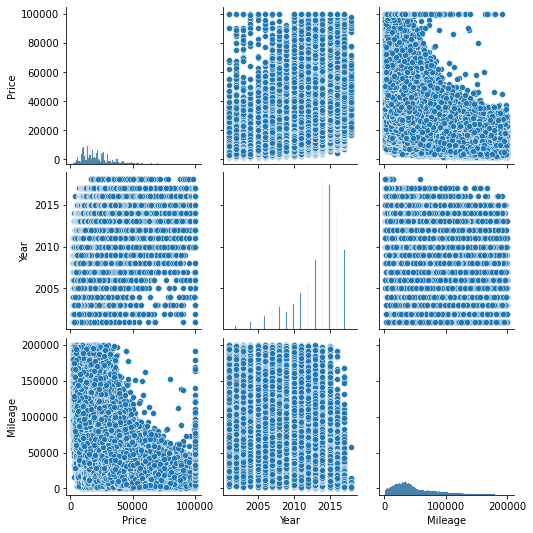

In [57]:
sns.pairplot(df)

In [51]:
df.set_index(['Price', 'Year']).sample(5)

,,Mileage,Make,Model
Price,Year,,,
19854,2016,42257,Dodge,ChargerSXT
12995,2002,99181,Lexus,SC
26975,2014,39915,Cadillac,SRXPerformance
12014,2016,10437,Hyundai,AccentSE
27999,2016,3952,Mitsubishi,Outlander


In [82]:
df.sort_values('Year').sample(10)

,Price,Year,Mileage,Make,Model
216321,16975,2016,43444,Dodge,Grand
175252,43998,2015,25918,Chevrolet,Tahoe4WD
536955,9795,2011,40569,Kia,Soul5dr
334901,21333,2013,107993,Ford,EdgeSport
580423,36945,2014,48530,Lincoln,Navigator4WD
379189,10792,2012,32865,Honda,Civic
131222,14899,2015,45811,Chevrolet,Malibu2LT
467307,16879,2009,60249,INFINITI,G37
635415,11395,2015,26494,Nissan,SentraSV
604394,19881,2007,32549,Mercedes-Benz,SLK-Class2dr


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831472 entries, 0 to 852121
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    831472 non-null  int64 
 1   Year     831472 non-null  int64 
 2   Mileage  831472 non-null  int64 
 3   Make     831472 non-null  object
 4   Model    831472 non-null  object
dtypes: int64(3), object(2)
memory usage: 38.1+ MB


In [85]:
list(df)


['Price', 'Year', 'Mileage', 'Make', 'Model']

In [86]:
df.to_csv('cars_cleaned.csv', index=False)